##                                      AutoML using PyCaret 
https://pycaret.org/

<div style="text-align:center"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOCeGgalYyL74ELN6qw65g1gq-TxCcmRjzHQ" /></div>


PyCaret is an open-source machine learning library in Python designed to simplify and expedite the machine learning workflow. It provides a low-code, easy-to-use interface for building, comparing, and deploying machine learning models. PyCaret's primary objective is to streamline the process of developing machine learning models, making it faster and more efficient to move from the initial hypothesis to gaining valuable insights from the data.

By automating various tasks such as data preprocessing, feature engineering, model selection, hyperparameter tuning, and model evaluation, PyCaret allows data scientists and machine learning practitioners to focus on the core aspects of their work, such as gaining insights from the data and developing more accurate and reliable models. With its rich collection of pre-built functionalities and a user-friendly API, PyCaret aims to reduce the time and effort required to experiment with different machine learning algorithms and methodologies, ultimately speeding up the overall machine learning experimentation and deployment process.  

In [1]:
!pip install --progress-bar off --upgrade --quiet pycaret[full]

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
aiobotocore 2.8.0 requires botocore<1.33.2,>=1.32.4, but you have botocore 1.29.165 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyter-server~=1.16, but you have jupyter-server 2.12.1 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyterlab~=3.4, but you have jupyterlab 4.0.5 which is incompatible.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.5 which is inc

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import json

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from pycaret.classification import *

## Loading the Dataset


In [5]:
train_df=pd.read_csv('/kaggle/input/playground-series-s3e22/train.csv', index_col='id)
train_df.head(5)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,None,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [8]:
train_new_df=pd.read_csv("/kaggle/input/horse-survival-dataset/horse.csv")
train_new_df.head(5)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [13]:
train_df = pd.concat([train_df, train_new_df]).reset_index(drop=True)
train_df.head(5)
print(train_df.shape)

(2431, 28)


Transform the 3-class classification problem into a binary classification task by eliminating the "euthanized" outcome from the dataset and reassigning class labels to create a binary classification scheme. This involves removing instances with the "euthanized" outcome, adjusting the class labels to represent a binary classification paradigm, and subsequently training and evaluating a binary classification model using the newly configured dataset.  

In [15]:
train_df=train_df[train_df['outcome']!='euthanized'].reset_index(drop=True)
print(train_df.shape)

(2004, 28)


## Setting up the Things

In [18]:
s=setup(
train_df,
target='outcome',
experiment_name='testing',
session_id=77,
fix_imbalance=True,
normalize=True)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c682e339000>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /opt/conda/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so: cannot open shared object file: No such file or directory


,Description,Value
0,Session id,77
1,Target,outcome
2,Target type,Binary
3,Target mapping,"died: 0, lived: 1"
4,Original data shape,"(2004, 28)"
5,Transformed data shape,"(2402, 78)"
6,Transformed train set shape,"(1800, 78)"
7,Transformed test set shape,"(602, 78)"
8,Ordinal features,4
9,Numeric features,11


In [19]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9094,0.9614,0.9094,0.9112,0.9097,0.8044,0.8056,6.3270
rf,Random Forest Classifier,0.9058,0.9682,0.9058,0.9076,0.9059,0.7959,0.7975,0.3360
xgboost,Extreme Gradient Boosting,0.9051,0.9609,0.9051,0.9063,0.9052,0.7941,0.7952,0.3720
lightgbm,Light Gradient Boosting Machine,0.9051,0.9652,0.9051,0.9062,0.9050,0.7934,0.7946,0.5000
et,Extra Trees Classifier,0.9037,0.9669,0.9037,0.9049,0.9037,0.7909,0.7920,0.3070
gbc,Gradient Boosting Classifier,0.8823,0.9486,0.8823,0.8828,0.8820,0.7432,0.7441,0.3990
dt,Decision Tree Classifier,0.8666,0.8547,0.8666,0.8675,0.8666,0.7099,0.7108,0.1700
ada,Ada Boost Classifier,0.8359,0.9171,0.8359,0.8417,0.8365,0.6477,0.6517,0.2670
lr,Logistic Regression,0.8153,0.9033,0.8153,0.8279,0.8174,0.6120,0.6188,0.5860
svm,SVM - Linear Kernel,0.8060,0.0000,0.8060,0.8135,0.8070,0.5853,0.5897,0.1640


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

From the table, it's evident that the CatBoost Classifier achieves the highest accuracy (0.9094) and F1 score (0.9112) among the listed classifiers, making it a strong performer in this comparison. The Random Forest Classifier, Extreme Gradient Boosting (XGBoost), and Light Gradient Boosting Machine (LightGBM) also demonstrate competitive performance, with slightly varying scores across the metrics.

However, it's noteworthy that the SVM model with a linear kernel displays an accuracy of 0.8060 but does not have a reported precision or recall, possibly indicating specific challenges in its performance evaluation or the nature of the problem it's applied to.

In [20]:
catboost  = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9291,0.9593,0.9291,0.9294,0.9284,0.8438,0.8454
1,0.9291,0.9684,0.9291,0.9291,0.9291,0.8464,0.8464
2,0.9286,0.9780,0.9286,0.9296,0.9289,0.8458,0.8462
3,0.9071,0.9720,0.9071,0.9067,0.9065,0.7950,0.7959
4,0.8857,0.9527,0.8857,0.8890,0.8866,0.7555,0.7569
5,0.9071,0.9627,0.9071,0.9141,0.9083,0.8039,0.8084
6,0.9143,0.9684,0.9143,0.9154,0.9146,0.8150,0.8154
7,0.9071,0.9513,0.9071,0.9091,0.9077,0.8004,0.8013
8,0.9071,0.9607,0.9071,0.9068,0.9069,0.7969,0.7970


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9078,0.9603,0.9078,0.9074,0.9072,0.7977,0.7986
1,0.9078,0.9508,0.9078,0.9074,0.9072,0.7977,0.7986
2,0.9286,0.9662,0.9286,0.9296,0.9289,0.8458,0.8462
3,0.9214,0.9736,0.9214,0.9212,0.9212,0.8281,0.8282
4,0.8571,0.9393,0.8571,0.8608,0.8583,0.6943,0.6956
5,0.9071,0.9442,0.9071,0.9113,0.9080,0.8022,0.8045
6,0.9286,0.9716,0.9286,0.9296,0.9289,0.8458,0.8462
7,0.8857,0.9436,0.8857,0.8857,0.8857,0.7511,0.7511
8,0.8714,0.9558,0.8714,0.8714,0.8714,0.7200,0.7200


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
random_forest  = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9149,0.9751,0.9149,0.9160,0.9136,0.8109,0.8145
1,0.9220,0.9736,0.9220,0.9258,0.9227,0.8346,0.8369
2,0.9143,0.9757,0.9143,0.9196,0.9152,0.8182,0.8216
3,0.9143,0.9772,0.9143,0.9142,0.9134,0.8100,0.8116
4,0.8786,0.9574,0.8786,0.8832,0.8797,0.7413,0.7435
5,0.9143,0.9657,0.9143,0.9172,0.9150,0.8166,0.8181
6,0.9286,0.9762,0.9286,0.9283,0.9282,0.8430,0.8435
7,0.8929,0.9587,0.8929,0.8925,0.8926,0.7656,0.7657
8,0.8929,0.9687,0.8929,0.8925,0.8926,0.7656,0.7657


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Hyperparameter Adjustments

In [23]:
tuned_random_forest = tune_model(random_forest)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8369,0.9242,0.8369,0.8354,0.8357,0.6422,0.6429
1,0.8652,0.9298,0.8652,0.8676,0.8660,0.7118,0.7126
2,0.8786,0.9536,0.8786,0.8861,0.8801,0.7435,0.7477
3,0.8500,0.9420,0.8500,0.8487,0.8489,0.6689,0.6697
4,0.8714,0.9200,0.8714,0.8808,0.8732,0.7296,0.7349
5,0.8643,0.9629,0.8643,0.8756,0.8663,0.7158,0.7224
6,0.8429,0.9121,0.8429,0.8467,0.8441,0.6638,0.6650
7,0.8714,0.9389,0.8714,0.8706,0.8708,0.7175,0.7178
8,0.8286,0.9184,0.8286,0.8266,0.8269,0.6199,0.6212


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Visualization


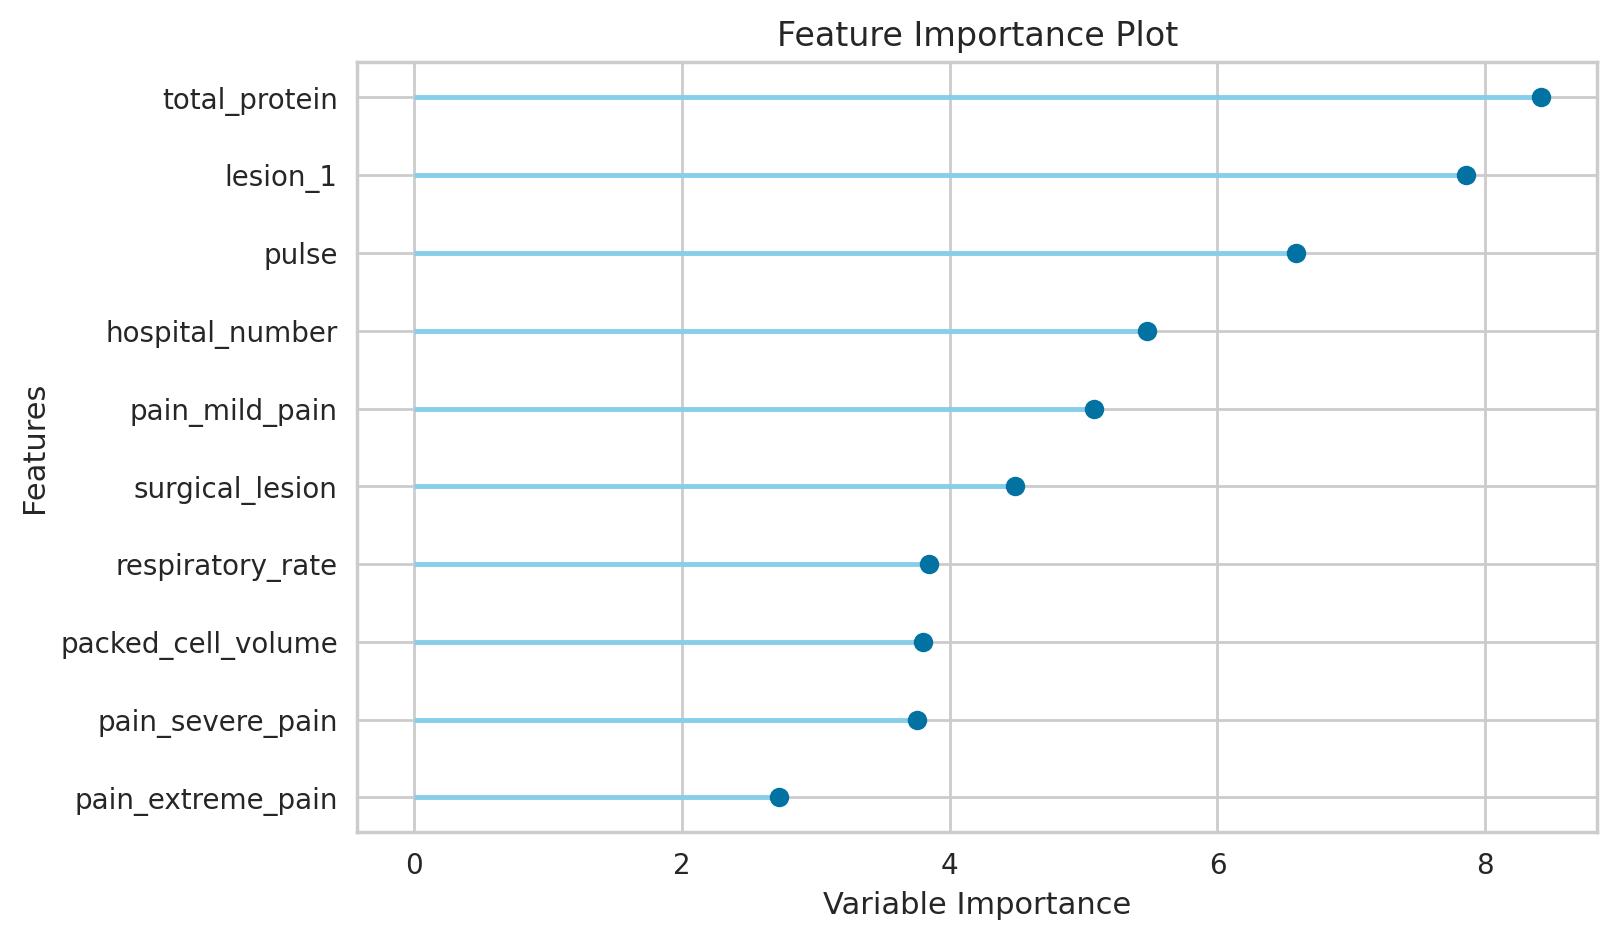

In [24]:
plot_model(catboost, plot='feature')

The above observation suggests a strong dependency between the outcome of whether a subject "lived" or "died" and the "total protein" feature. This indicates that the "total protein" feature plays a crucial role in determining the outcome for the subjects under consideration.

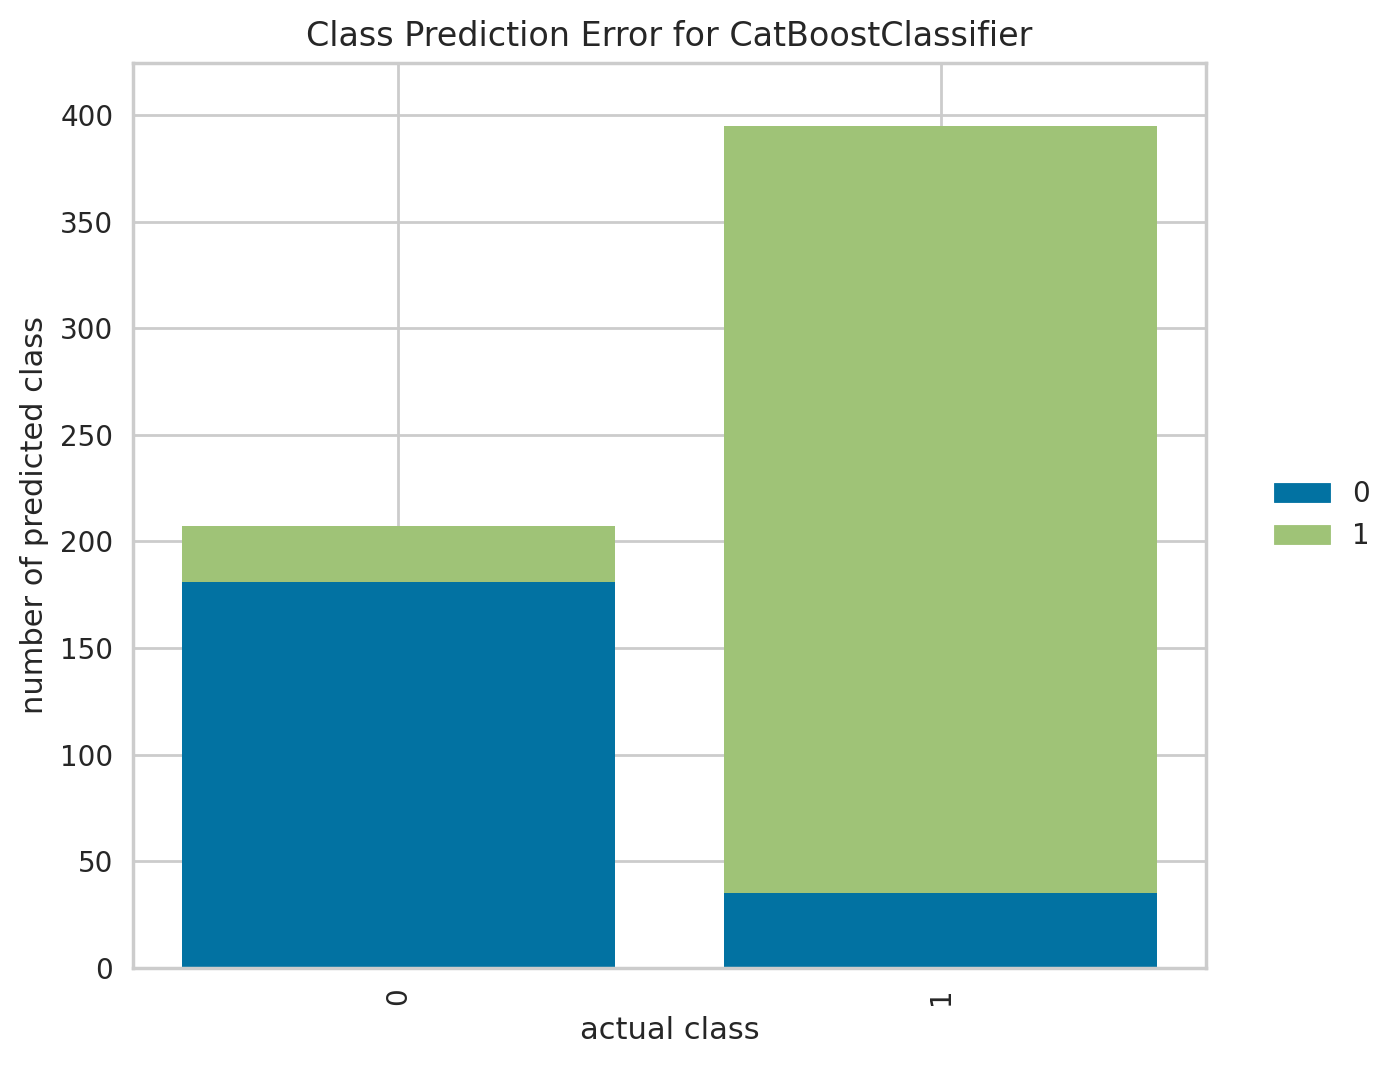

In [25]:
plot_model(catboost, plot = 'error')

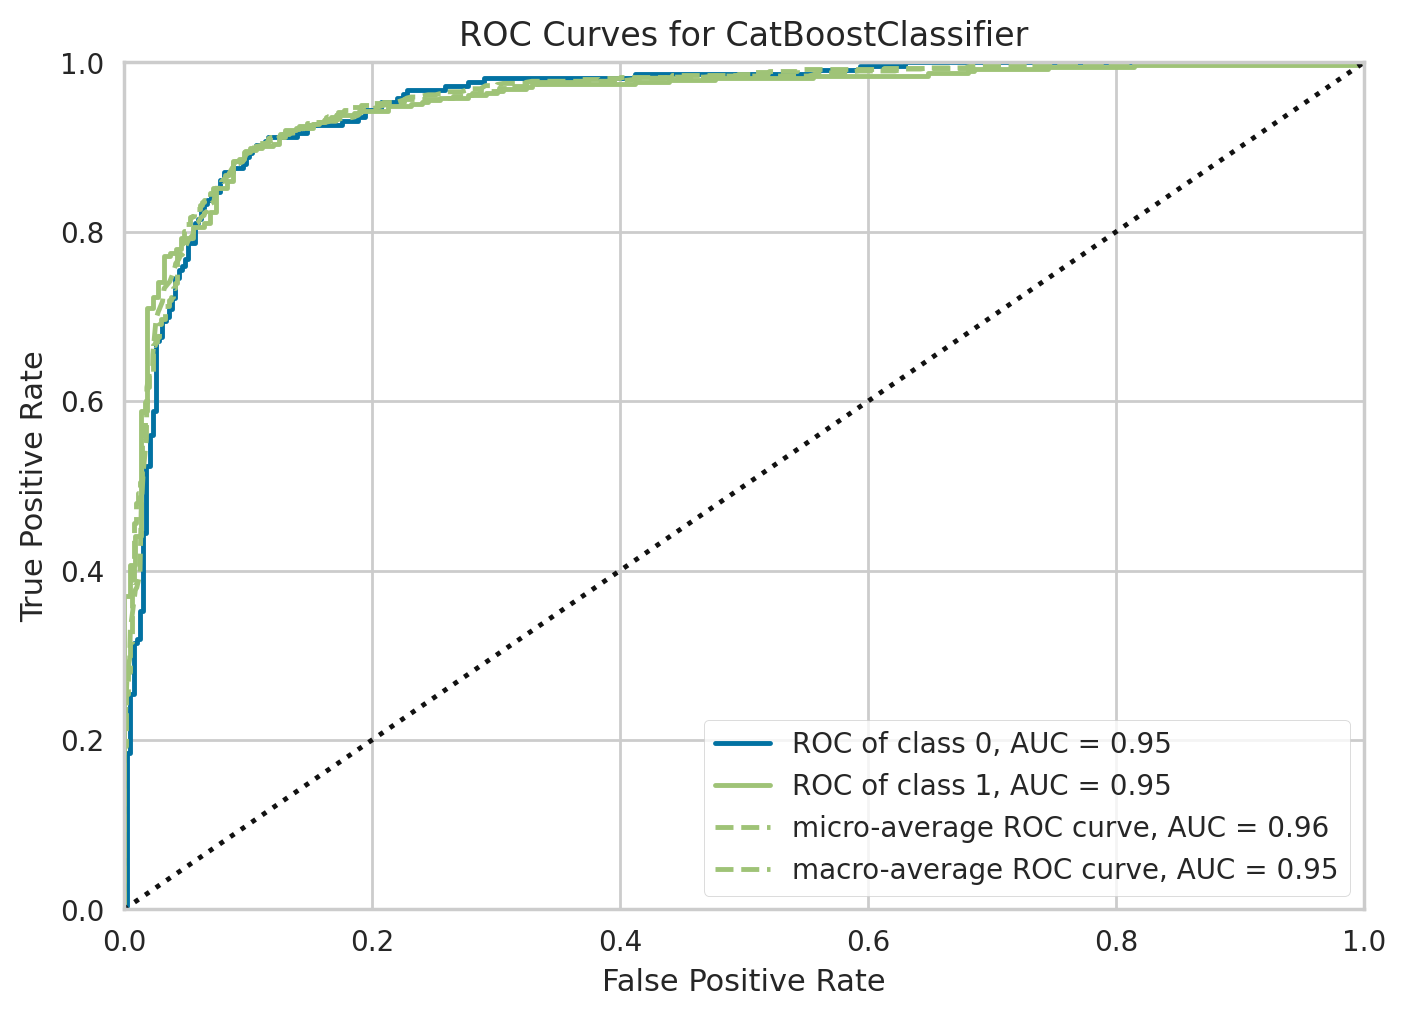

In [33]:
plot_model(best, plot = 'auc')

## Predictions

In [26]:
test_df = pd.read_csv('/kaggle/input/playground-series-s3e22/test.csv', index_col='id')

print(test_df.shape)
test_df.head(5)

(824, 27)


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
id,,,,,,,,,,,,,,,,,,,,,
1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,less_3_sec,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,more_3_sec,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,less_3_sec,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,...,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,less_3_sec,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [27]:
predictions_df = predict_model(best, data=test_df, raw_score=True)

print(predictions_df.shape)
predictions_df.head(3)

(824, 30)


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,prediction_label,prediction_score_died,prediction_score_lived
id,,,,,,,,,,,,,,,,,,,,,
1235,no,adult,534053,38.599998,40.0,20.0,normal,normal,normal_pink,less_3_sec,...,clear,2.3,no,0,0,0,no,lived,0.0046,0.9954
1236,yes,adult,528469,38.200001,112.0,48.0,cool,reduced,bright_pink,more_3_sec,...,serosanguious,2.6,no,2208,0,0,yes,died,0.5337,0.4663
1237,yes,adult,528178,37.700001,66.0,12.0,cool,normal,bright_red,less_3_sec,...,cloudy,1.6,yes,2205,0,0,yes,lived,0.1028,0.8972


In [37]:
submission_df=pd.DataFrame({'id':test_df.index,'outcome':predictions_df['prediction_label']})
submission_df.to_csv("submission.csv",index=False)
print(submission_df.shape)
submission_df.head(5)

(824, 2)


,id,outcome
id,,
1235,1235,lived
1236,1236,died
1237,1237,lived
1238,1238,lived
1239,1239,lived


In [32]:
import shutil
import os
shutil.rmtree("/kaggle/working/catboost_info")
os.remove("/kaggle/working/logs.log")
